In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('accidents_clean.csv')

In [3]:
df.head()

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,...,railway,roundabout,station,stop,traffic_calming,traffic_signal,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,0,0,0,0,0,0,1,1,1,1
1,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,0,0,0,0,0,0,0,0,0,0
2,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,0,0,0,0,0,0,0,0,0,0
3,A-10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,At I-71/Exit 26 - Accident.,...,0,0,0,0,0,0,0,0,0,0
4,A-11,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,0.307,At OH-4/Paddock Rd/Exit 9 - Accident.,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207325 entries, 0 to 2207324
Data columns (total 43 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     2207325 non-null  object 
 1   severity               2207325 non-null  int64  
 2   start_time             2207325 non-null  object 
 3   end_time               2207325 non-null  object 
 4   start_lat              2207325 non-null  float64
 5   start_lng              2207325 non-null  float64
 6   end_lat                2207325 non-null  float64
 7   end_lng                2207325 non-null  float64
 8   distance(mi)           2207325 non-null  float64
 9   description            2207325 non-null  object 
 10  street                 2207325 non-null  object 
 11  side                   2207325 non-null  object 
 12  city                   2207325 non-null  object 
 13  county                 2207325 non-null  object 
 14  state             

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
severity,2207325.0,2.074862,0.383241,1.000000,2.000000,2.000000,2.000000,4.00000
start_lat,2207325.0,36.007256,5.472439,24.566027,32.961337,35.742292,40.068340,49.00058
start_lng,2207325.0,-96.620942,18.264535,-124.548074,-117.977579,-91.066492,-80.335197,-67.48413
end_lat,2207325.0,36.007402,5.472547,24.566013,32.960648,35.742992,40.068509,49.07500
end_lng,2207325.0,-96.620680,18.264283,-124.545748,-117.978173,-91.065553,-80.335591,-67.48413
distance(mi),2207325.0,0.696784,1.505373,0.000000,0.046000,0.210000,0.782000,155.18600
temperature(f),2207325.0,61.838083,18.561719,-33.000000,50.000000,64.000000,76.000000,196.00000
wind_chill(f),2207325.0,60.716421,20.518191,-50.100000,50.000000,64.000000,76.000000,196.00000
humidity(%),2207325.0,64.684914,22.713228,1.000000,49.000000,67.000000,84.000000,100.00000
pressure(in),2207325.0,29.373684,1.092007,16.720000,29.210000,29.730000,29.970000,58.90000


In [6]:
df['precipitation(in)'].sort_values().tail()

1295526    10.4
1686977    24.0
1357098    24.0
1614530    24.0
258289     24.0
Name: precipitation(in), dtype: float64

In [7]:
df = df[df['precipitation(in)'] < 20]

In [8]:
df['visibility(mi)'].value_counts()

10.00     1766840
7.00        61696
9.00        56574
8.00        45690
5.00        43120
6.00        40337
2.00        40317
4.00        37439
3.00        36327
1.00        35235
0.25        10829
0.50        10260
0.75         7653
0.00         2962
13.00        1925
15.00        1792
2.50         1078
0.80          912
20.00         886
0.20          815
1.50          779
0.12          678
1.20          588
1.80          573
40.00         497
30.00         330
25.00         254
80.00         180
50.00         141
0.06          105
0.38           97
0.63           79
0.88           54
0.10           47
100.00         37
60.00          36
75.00          33
45.00          27
70.00          21
12.00          18
35.00          16
0.60           12
90.00           9
0.19            5
23.00           3
2.80            2
0.40            2
47.00           2
22.00           2
14.00           2
16.00           1
1.90            1
1.10            1
1.60            1
43.00           1
Name: visi

In [9]:
df = df[df['wind_speed(mph)'] <= 50]

<AxesSubplot:>

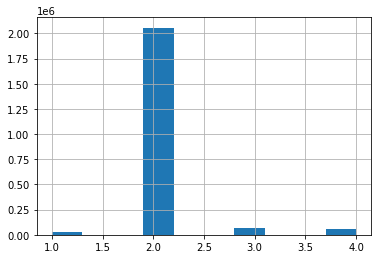

In [10]:
df.severity.hist()

<AxesSubplot:>

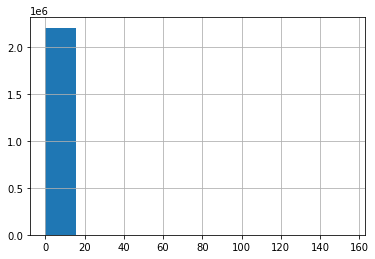

In [11]:
df['distance(mi)'].hist()

<AxesSubplot:>

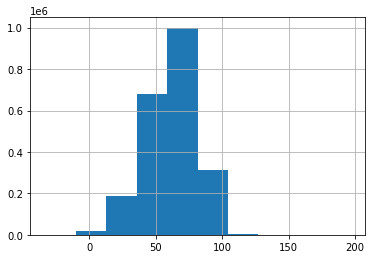

In [12]:
df['temperature(f)'].hist()

<AxesSubplot:>

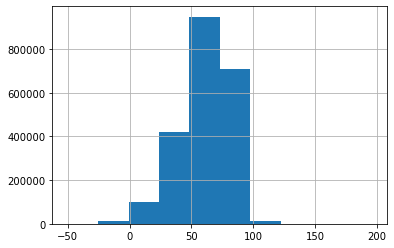

In [13]:
df['wind_chill(f)'].hist()

<AxesSubplot:>

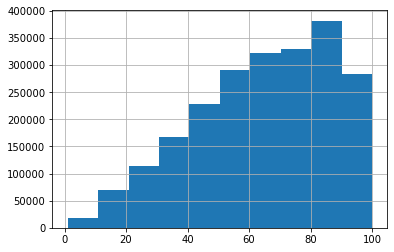

In [14]:
df['humidity(%)'].hist()

<AxesSubplot:>

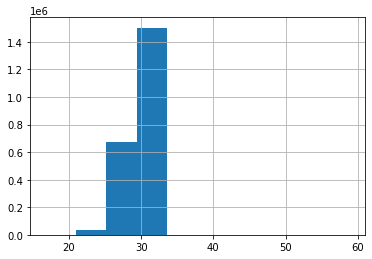

In [15]:
df['pressure(in)'].hist()

<AxesSubplot:>

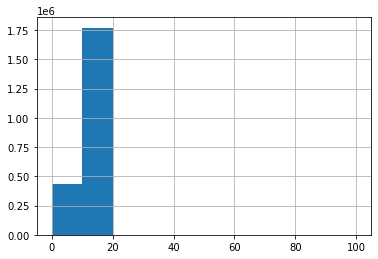

In [16]:
df['visibility(mi)'].hist()

<AxesSubplot:>

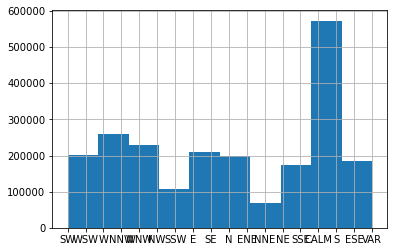

In [17]:
df.wind_direction.hist()

<AxesSubplot:>

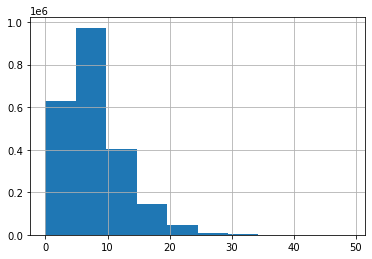

In [18]:
df['wind_speed(mph)'].hist()

<AxesSubplot:>

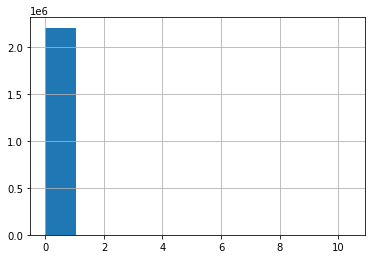

In [19]:
df['precipitation(in)'].hist()

<AxesSubplot:>

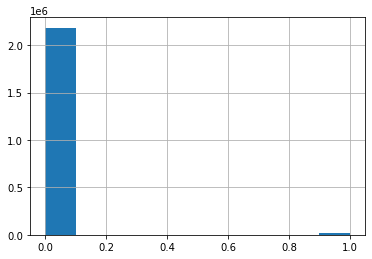

In [20]:
df.amenity.hist()

<AxesSubplot:>

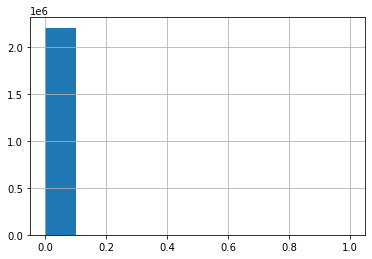

In [21]:
df.bump.hist()

<AxesSubplot:>

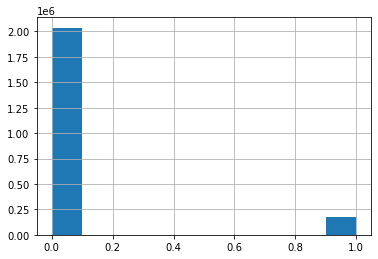

In [22]:
df.crossing.hist()

<AxesSubplot:>

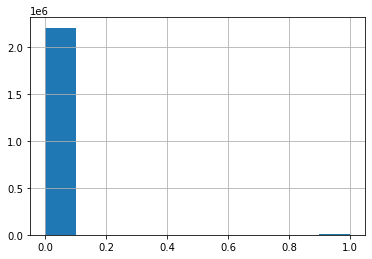

In [23]:
df.give_way.hist()

<AxesSubplot:>

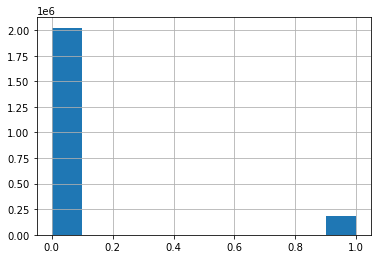

In [24]:
df.junction.hist()

<AxesSubplot:>

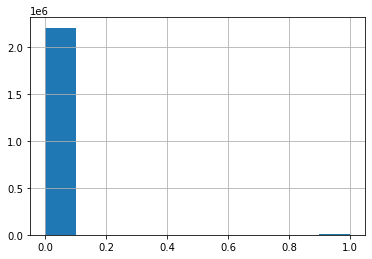

In [25]:
df.no_exit.hist()

<AxesSubplot:>

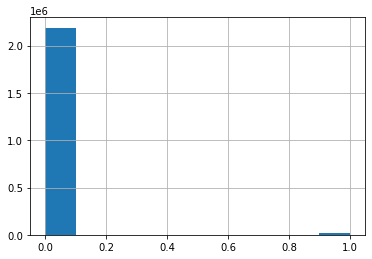

In [26]:
df.railway.hist()

<AxesSubplot:>

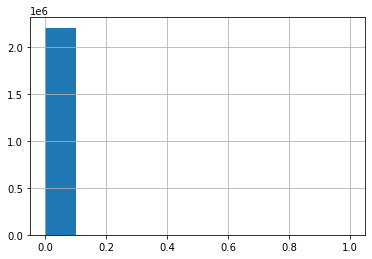

In [27]:
df.roundabout.hist()

<AxesSubplot:>

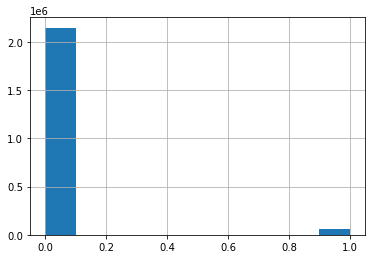

In [28]:
df.station.hist()

<AxesSubplot:>

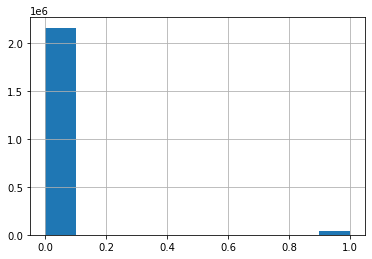

In [29]:
df.stop.hist()

<AxesSubplot:>

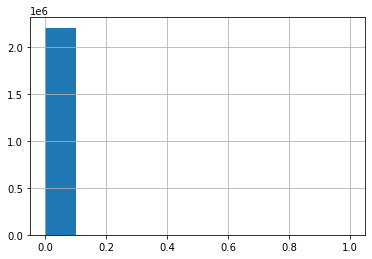

In [30]:
df.traffic_calming.hist()

<AxesSubplot:>

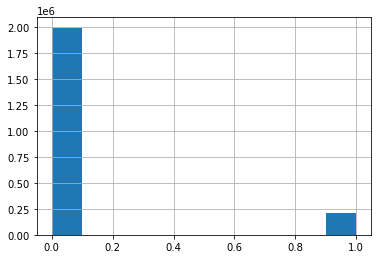

In [31]:
df.traffic_signal.hist()

<AxesSubplot:>

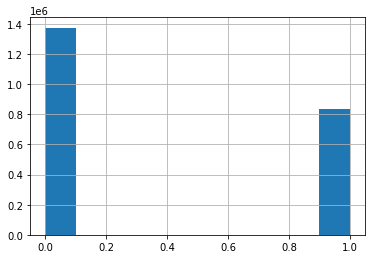

In [32]:
df.sunrise_sunset.hist()

<AxesSubplot:>

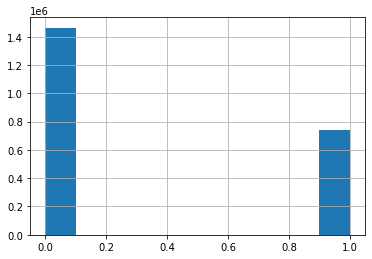

In [33]:
df.civil_twilight.hist()

<AxesSubplot:>

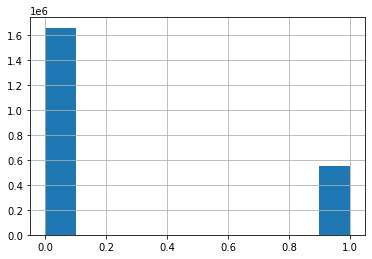

In [34]:
df.astronomical_twilight.hist()

<AxesSubplot:>

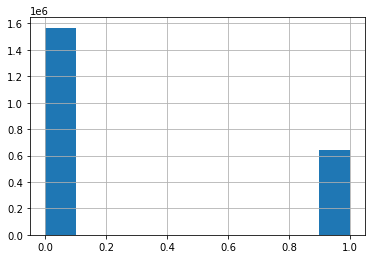

In [35]:
df.nautical_twilight.hist()

In [36]:
def split_data(df, column):
    '''This function takes in two arguments, a dataframe and a string. The string argument is the name of the
        column that will be used to stratify the train_test_split. The function returns three dataframes, a 
        training dataframe with 60 percent of the data, a validate dataframe with 20 percent of the data and test
        dataframe with 20 percent of the data.'''
    train, test = train_test_split(df, test_size=.2, random_state=217, stratify=df[column])
    train, validate = train_test_split(train, test_size=.25, random_state=217, stratify=train[column])
    return train, validate, test

In [37]:
train, validate, test = split_data(df, 'severity')

In [38]:
train.shape, validate.shape, test.shape

((1324347, 43), (441449, 43), (441450, 43))

In [39]:
train.severity.value_counts()

2    1234204
3      38748
4      37262
1      14133
Name: severity, dtype: int64

<AxesSubplot:xlabel='severity', ylabel='count'>

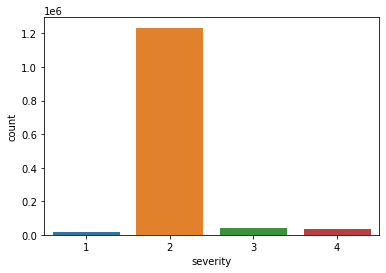

In [40]:
sns.countplot(x=train.severity)

<AxesSubplot:xlabel='severity', ylabel='count'>

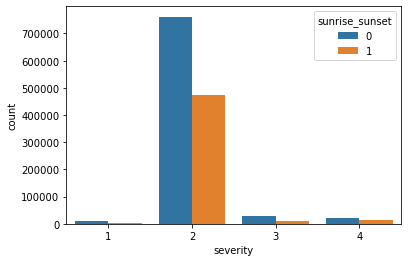

In [41]:
sns.countplot(x=train.severity, hue=train.sunrise_sunset)

<AxesSubplot:xlabel='severity', ylabel='distance(mi)'>

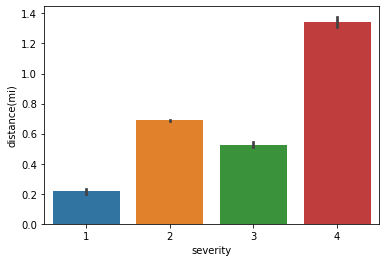

In [42]:
sns.barplot(x='severity', y='distance(mi)', data=train)

<AxesSubplot:xlabel='severity', ylabel='temperature(f)'>

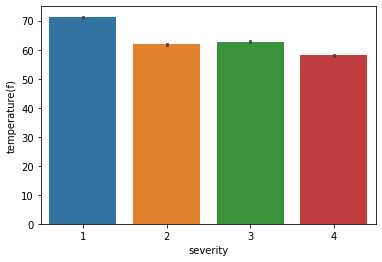

In [43]:
sns.barplot(x='severity', y='temperature(f)', data=train)

<AxesSubplot:xlabel='severity', ylabel='wind_chill(f)'>

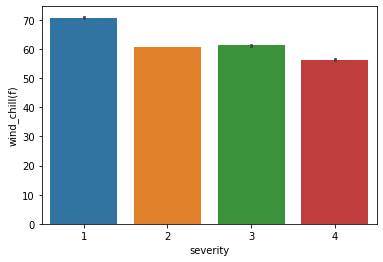

In [44]:
sns.barplot(x='severity', y='wind_chill(f)', data=train)

<AxesSubplot:xlabel='severity', ylabel='humidity(%)'>

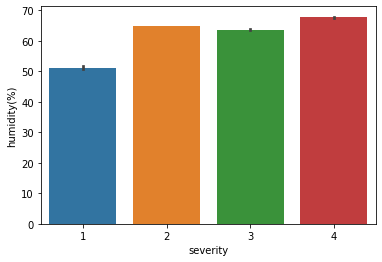

In [45]:
sns.barplot(x='severity', y='humidity(%)', data=train)

<AxesSubplot:xlabel='severity', ylabel='pressure(in)'>

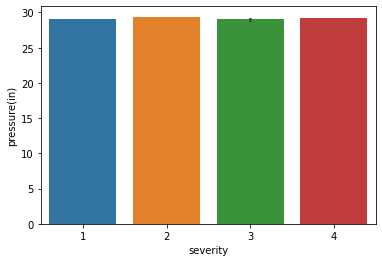

In [46]:
sns.barplot(x='severity', y='pressure(in)', data=train)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324347 entries, 1660022 to 1539598
Data columns (total 43 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1324347 non-null  object 
 1   severity               1324347 non-null  int64  
 2   start_time             1324347 non-null  object 
 3   end_time               1324347 non-null  object 
 4   start_lat              1324347 non-null  float64
 5   start_lng              1324347 non-null  float64
 6   end_lat                1324347 non-null  float64
 7   end_lng                1324347 non-null  float64
 8   distance(mi)           1324347 non-null  float64
 9   description            1324347 non-null  object 
 10  street                 1324347 non-null  object 
 11  side                   1324347 non-null  object 
 12  city                   1324347 non-null  object 
 13  county                 1324347 non-null  object 
 14  state       

<AxesSubplot:xlabel='severity', ylabel='visibility(mi)'>

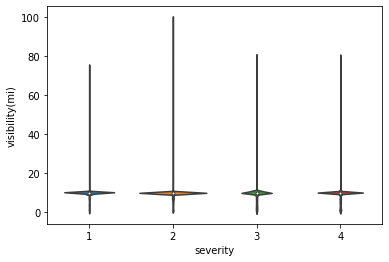

In [48]:
sns.violinplot(x='severity', y='visibility(mi)', data=train)

<AxesSubplot:xlabel='severity', ylabel='wind_speed(mph)'>

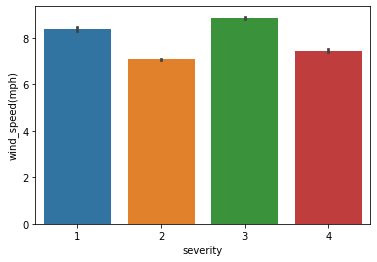

In [49]:
sns.barplot(x='severity', y='wind_speed(mph)', data=train)

<AxesSubplot:xlabel='severity', ylabel='precipitation(in)'>

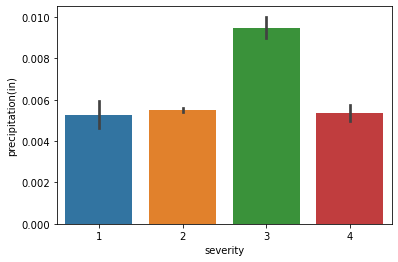

In [50]:
sns.barplot(x='severity', y='precipitation(in)', data=train)

<AxesSubplot:xlabel='severity', ylabel='count'>

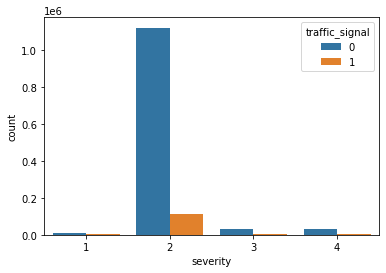

In [51]:
sns.countplot(x=train.severity, hue=train.traffic_signal)

In [52]:
df.weather_timestamp = pd.to_datetime(df.weather_timestamp)

In [53]:
df.start_time = pd.to_datetime(df.start_time)

In [54]:
df.end_time = pd.to_datetime(df.end_time)

In [55]:
train.weather_timestamp = pd.to_datetime(train.weather_timestamp)
train.start_time = pd.to_datetime(train.start_time)
train.end_time = pd.to_datetime(train.end_time)

In [56]:
validate.weather_timestamp = pd.to_datetime(validate.weather_timestamp)
validate.start_time = pd.to_datetime(validate.start_time)
validate.end_time = pd.to_datetime(validate.end_time)

In [57]:
test.weather_timestamp = pd.to_datetime(test.weather_timestamp)
test.start_time = pd.to_datetime(test.start_time)
test.end_time = pd.to_datetime(test.end_time)

In [58]:
# can I use this? total time is one of the ways severity is determined (data leakage)??
train['total_time'] = train.end_time - train.start_time

Statistical Test for Distance(mi) and severity

In [59]:
sev1_dist = train[train.severity==1]['distance(mi)']
sev2_dist = train[train.severity==2]['distance(mi)']
sev3_dist = train[train.severity==3]['distance(mi)']
sev4_dist = train[train.severity==4]['distance(mi)']

In [60]:
print(sev1_dist.var())
print(sev2_dist.var())
print(sev3_dist.var())
print(sev4_dist.var())

1.132259227153684
1.947844061648998
3.5678475948233626
12.075951903035989


In [61]:
alpha = .05
stat, p = stats.levene(sev1_dist, sev2_dist)
if p < alpha:
    print('we can reject the null hypothesis and posit that variance is inequal')

we can reject the null hypothesis and posit that variance is inequal


The other variances are obviously inequal.

In [62]:
stat, p = stats.kruskal(sev1_dist, sev2_dist, sev3_dist, sev4_dist)
stat, p

(34807.82161779825, 0.0)

In [63]:
p < alpha

True

### MVP Model

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [65]:
cols = ['distance(mi)','precipitation(in)','visibility(mi)']

In [66]:
baseline = train.severity.mode()

In [67]:
X_train = train[cols]
y_train = train.severity

X_validate = validate[cols]
y_validate = validate.severity

X_test = test[cols]
y_test = test.severity

In [68]:
train['baseline'] = 2

#### This dataset is imbalanced!

In [69]:
1234245/1324395

0.9319311836725448

In [70]:
# using 'balanced' class_weight to account for the unbalanced dataset
clf = DecisionTreeClassifier(max_depth=4, random_state=217, class_weight='balanced')

In [71]:
clf = clf.fit(X_train, y_train)

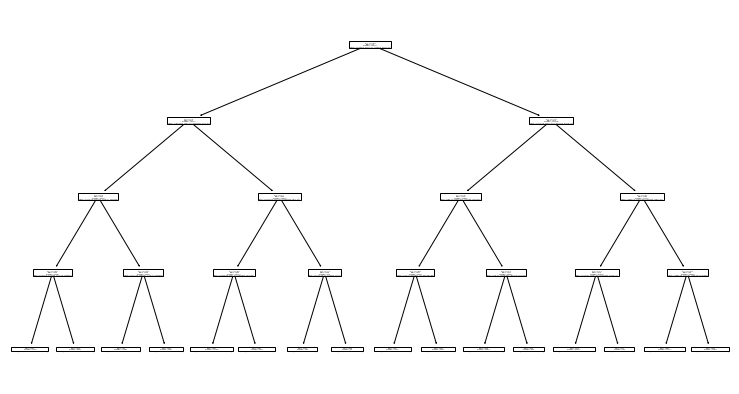

In [72]:
plt.figure(figsize=(13, 7))
plot_tree(clf)
plt.show()

In [73]:
y_pred = clf.predict(X_train)

In [74]:
y_pred_proba = clf.predict_proba(X_train)

In [75]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.34


In [76]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.07      0.88      0.13     14133
           2       0.97      0.33      0.49   1234204
           3       0.14      0.04      0.06     38748
           4       0.04      0.71      0.07     37262

    accuracy                           0.34   1324347
   macro avg       0.30      0.49      0.19   1324347
weighted avg       0.91      0.34      0.46   1324347



In [77]:
y_pred_baseline = train['baseline']

In [78]:
confusion_matrix(y_train, y_pred)

array([[ 12409,    187,    319,   1218],
       [152212, 408030,   8121, 665841],
       [ 17040,   3549,   1394,  16765],
       [  2433,   8344,    184,  26301]])

In [79]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.07      0.88      0.13     14133
           2       0.97      0.33      0.49   1234204
           3       0.14      0.04      0.06     38748
           4       0.04      0.71      0.07     37262

    accuracy                           0.34   1324347
   macro avg       0.30      0.49      0.19   1324347
weighted avg       0.91      0.34      0.46   1324347



In [80]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.34


### Downsample the data

- I attempted to use a randomizer using imbalanced-learn but it was unsuccessful. I'm making a random downsample but I cannot ensure that critical data has not been lost in the process. I'll revisit this later.

In [81]:
train[train.severity==2].sample(40000, random_state=217)

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,...,station,stop,traffic_calming,traffic_signal,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,total_time,baseline
597708,A-851966,2,2021-07-05 19:41:00,2021-07-05 20:01:00,28.555660,-81.475880,28.559354,-81.475895,0.255,Stationary traffic on County Hwy-435 from FL-5...,...,0,0,0,0,0,0,0,0,0 days 00:20:00,2
931097,A-1206777,2,2021-07-31 04:53:00,2021-07-31 08:19:58,33.387140,-117.175959,33.387170,-117.173319,0.152,Accident on CR-S13/E Mission Rd (Old CA-395) f...,...,0,0,0,1,1,1,1,0,0 days 03:26:58,2
2206319,A-2844265,2,2019-08-21 16:33:32,2019-08-21 20:33:32,45.546590,-122.537390,45.546717,-122.538258,0.043,At I-84/US-30/I-205/Exit 9 - Accident.,...,0,0,0,0,0,0,0,0,0 days 04:00:00,2
235201,A-466101,2,2021-12-26 08:40:10,2021-12-26 09:58:10,37.096711,-77.548065,37.097959,-77.547001,0.104,Incident on I-85 NB near MM 55 Expect long del...,...,0,0,0,0,0,0,0,0,0 days 01:18:00,2
1976263,A-2336215,2,2020-02-11 16:42:05,2020-02-11 17:11:28,32.529780,-93.670240,32.527940,-93.677620,0.448,At Industrial Dr/Exit 23 - Accident. Right lan...,...,0,0,0,0,0,0,0,0,0 days 00:29:23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057527,A-1341137,2,2021-11-26 12:20:00,2021-11-26 13:57:37,30.317025,-97.704076,30.315750,-97.701524,0.176,Incident on REINLI ST near SHERIDAN AVE Drive ...,...,0,0,0,0,0,0,0,0,0 days 01:37:37,2
336636,A-574045,2,2021-09-07 12:57:30,2021-09-07 20:46:30,38.704969,-77.224142,38.669225,-77.263061,3.241,Stationary traffic on I-95 S from Exit 163 (I-...,...,0,0,0,0,0,0,0,0,0 days 07:49:00,2
1995869,A-2358182,2,2020-01-02 10:47:30,2020-01-02 11:40:58,37.750590,-122.151550,37.750590,-122.151550,0.000,At 98th Ave/Golf Links Rd - Accident.,...,0,0,0,0,0,0,0,0,0 days 00:53:28,2
1362788,A-1668241,2,2021-01-16 21:47:00,2021-01-16 23:28:02,33.562095,-112.242066,33.562043,-112.246391,0.249,Incident on RUTH AVE near HOUSE 8600 Drive wit...,...,0,1,0,0,1,1,1,1,0 days 01:41:02,2


In [82]:
df2 = pd.read_csv('downsample_data.csv')

In [83]:
df2.head()

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance,description,...,railway,roundabout,station,stop,traffic_calming,traffic_signal,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-1735389,1,2020-08-03 14:35:16,2020-08-03 15:20:16,32.20676,-110.98050,32.20676,-110.98050,0.0,At I-10/Freeway - Accident.,...,0,0,0,1,0,1,0,0,0,0
1,A-1736992,1,2020-09-22 16:44:38,2020-09-22 17:29:38,32.38084,-110.96392,32.38084,-110.96392,0.0,At N 1st Ave - Accident.,...,0,0,0,0,0,1,0,0,0,0
2,A-1749720,1,2020-08-03 15:42:10,2020-08-03 15:57:10,41.37978,-81.99410,41.37978,-81.99410,0.0,At I-80 - Accident.,...,0,0,0,0,0,0,0,0,0,0
3,A-1751860,1,2020-09-22 16:29:33,2020-09-22 17:14:33,33.63950,-112.13436,33.63950,-112.13436,0.0,At N 35th Ave - Accident.,...,0,0,0,0,0,1,0,0,0,0
4,A-1753409,1,2020-08-03 13:41:01,2020-08-03 13:56:01,38.08320,-122.11450,38.08320,-122.11450,0.0,At Lake Herman Rd - Accident. Hard shoulder bl...,...,0,0,0,0,0,0,0,0,0,0


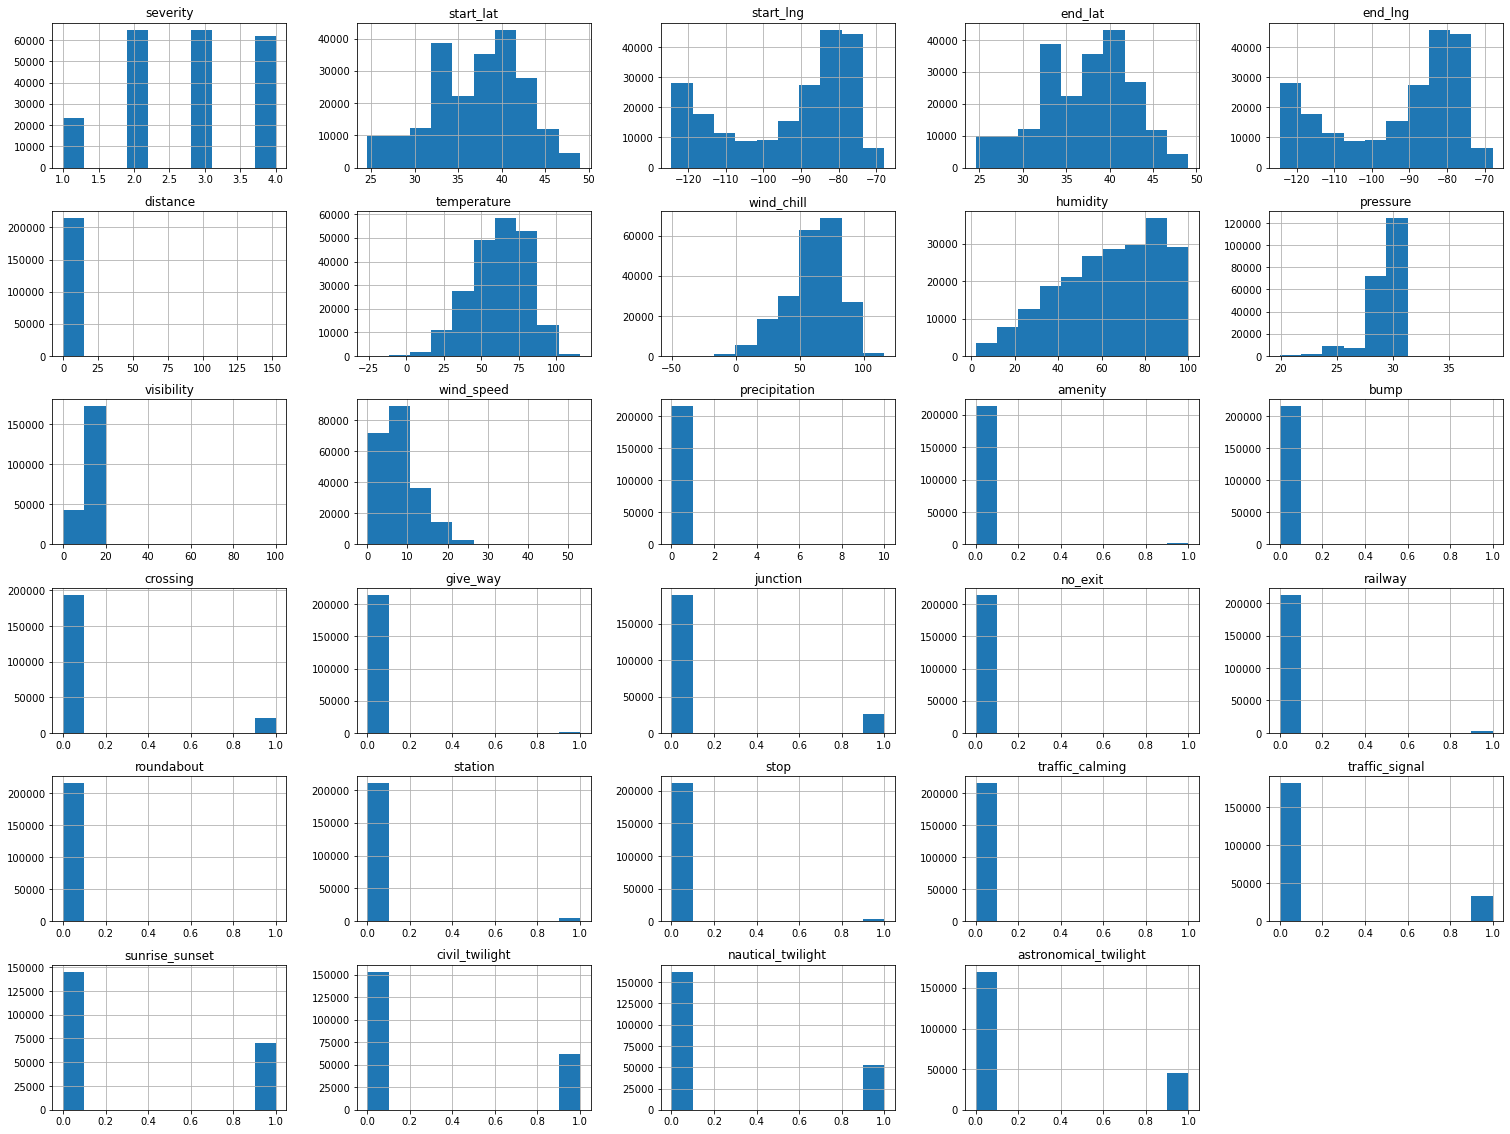

In [84]:
df2.hist(figsize=[26,20])
plt.show()

In [85]:
train, validate, test = split_data(df2, 'severity')

In [86]:
train.shape, validate.shape, test.shape

((129144, 43), (43048, 43), (43048, 43))

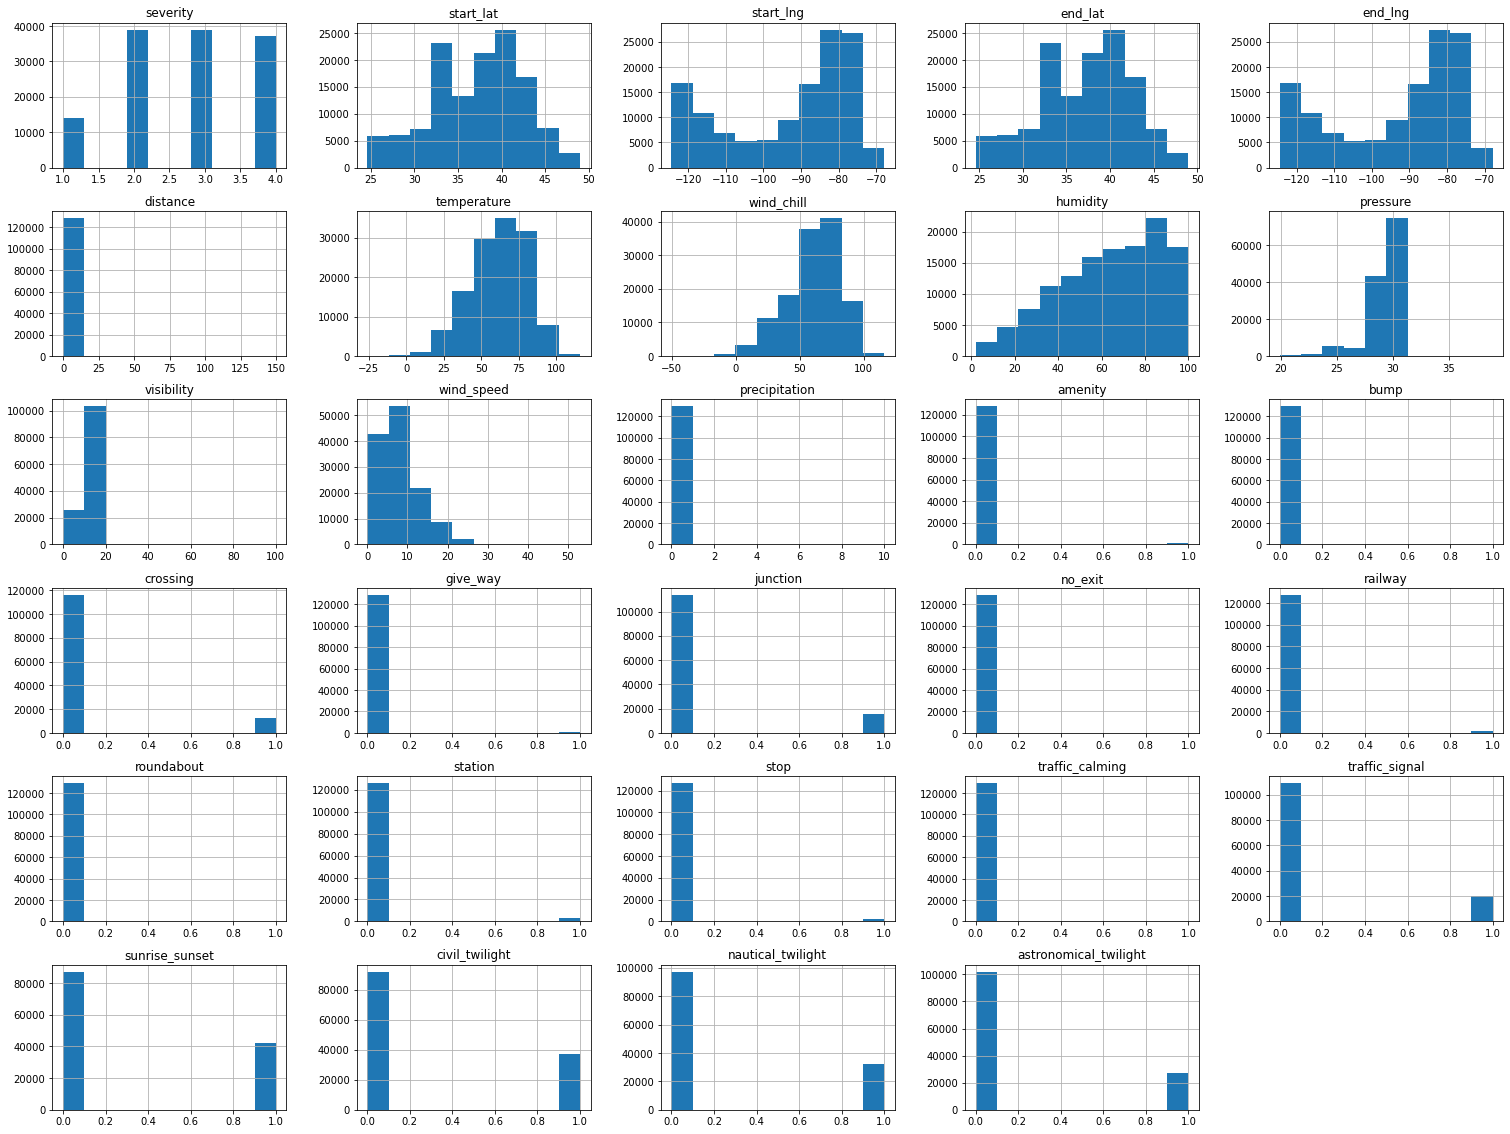

In [87]:
train.hist(figsize=[26,20])
plt.show()

<AxesSubplot:xlabel='severity', ylabel='count'>

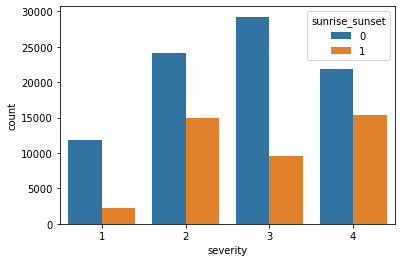

In [88]:
sns.countplot(x=train.severity, hue=train.sunrise_sunset)

<AxesSubplot:xlabel='severity', ylabel='count'>

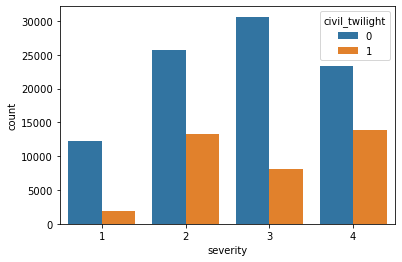

In [89]:
sns.countplot(x=train.severity, hue=train.civil_twilight)

<AxesSubplot:xlabel='severity', ylabel='count'>

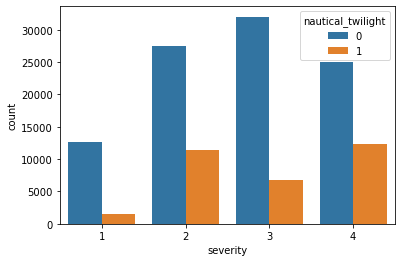

In [90]:
sns.countplot(x=train.severity, hue=train.nautical_twilight)

<AxesSubplot:xlabel='severity', ylabel='count'>

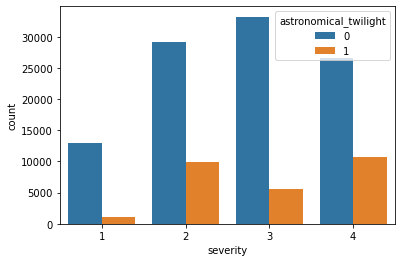

In [91]:
sns.countplot(x=train.severity, hue=train.astronomical_twilight)

In [92]:
def plot_day_night(train):
    plt.figure(figsize=[20,6])
    plt.subplot(1,4,1)
    sns.countplot(x=train.severity, hue=train.sunrise_sunset)
    plt.subplot(1,4,2)
    sns.countplot(x=train.severity, hue=train.civil_twilight)
    plt.subplot(1,4,3)
    sns.countplot(x=train.severity, hue=train.nautical_twilight)
    plt.subplot(1,4,4)
    sns.countplot(x=train.severity, hue=train.astronomical_twilight)

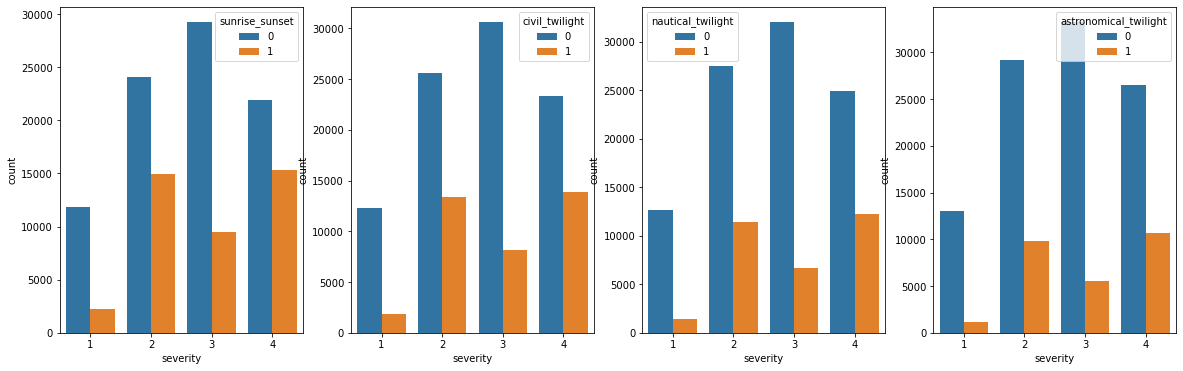

In [93]:
plot_day_night(train)

<AxesSubplot:xlabel='severity', ylabel='count'>

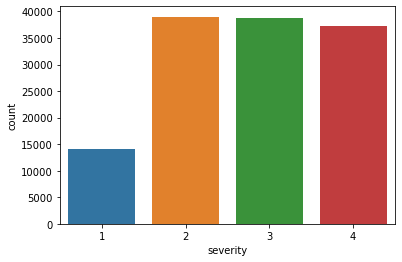

In [94]:
sns.countplot(x=train.severity)

<AxesSubplot:xlabel='severity', ylabel='distance'>

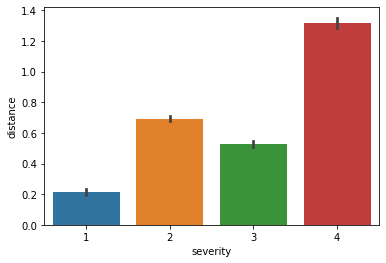

In [95]:
sns.barplot(x='severity', y='distance', data=train)

<AxesSubplot:xlabel='severity', ylabel='temperature'>

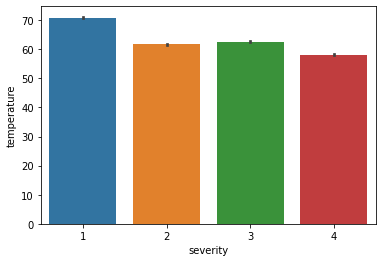

In [96]:
sns.barplot(x='severity', y='temperature', data=train)

<AxesSubplot:xlabel='severity', ylabel='wind_chill'>

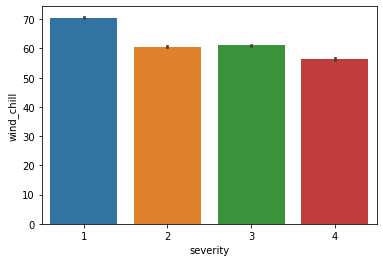

In [97]:
sns.barplot(x='severity', y='wind_chill', data=train)

<AxesSubplot:xlabel='severity', ylabel='humidity'>

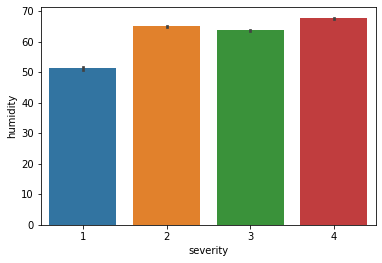

In [98]:
sns.barplot(x='severity', y='humidity', data=train)

<AxesSubplot:xlabel='severity', ylabel='pressure'>

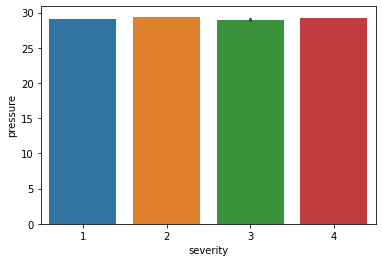

In [99]:
sns.barplot(x='severity', y='pressure', data=train)

<AxesSubplot:xlabel='severity', ylabel='visibility'>

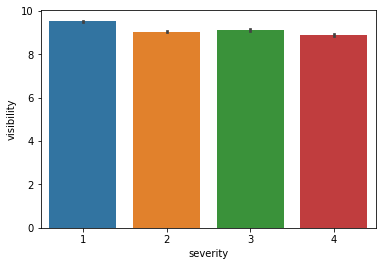

In [100]:
sns.barplot(x='severity', y='visibility', data=train)

<AxesSubplot:xlabel='severity', ylabel='precipitation'>

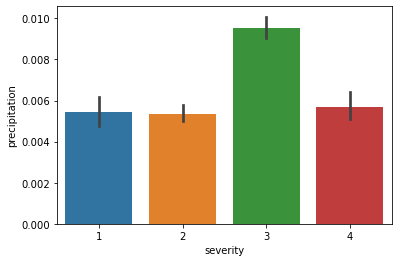

In [101]:
sns.barplot(x='severity', y='precipitation', data=train)

<AxesSubplot:xlabel='severity', ylabel='wind_speed'>

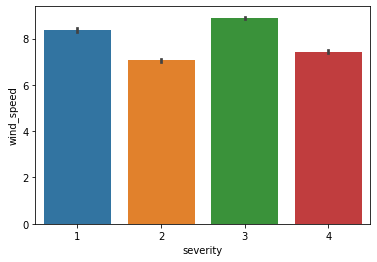

In [102]:
sns.barplot(x='severity', y='wind_speed', data=train)

In [103]:
def barplot_data(train):
    plt.figure(figsize=[20,9])
    plt.subplot(2,4,1)
    sns.barplot(x='severity', y='distance', data=train)
    plt.subplot(2,4,2)
    sns.barplot(x='severity', y='temperature', data=train)
    plt.subplot(2,4,3)
    sns.barplot(x='severity', y='wind_chill', data=train)
    plt.subplot(2,4,4)
    sns.barplot(x='severity', y='humidity', data=train)
    plt.subplot(2,4,5)
    sns.barplot(x='severity', y='pressure', data=train)
    plt.subplot(2,4,6)
    sns.barplot(x='severity', y='visibility', data=train)
    plt.subplot(2,4,7)
    sns.barplot(x='severity', y='precipitation', data=train)
    plt.subplot(2,4,8)
    sns.barplot(x='severity', y='wind_speed', data=train)

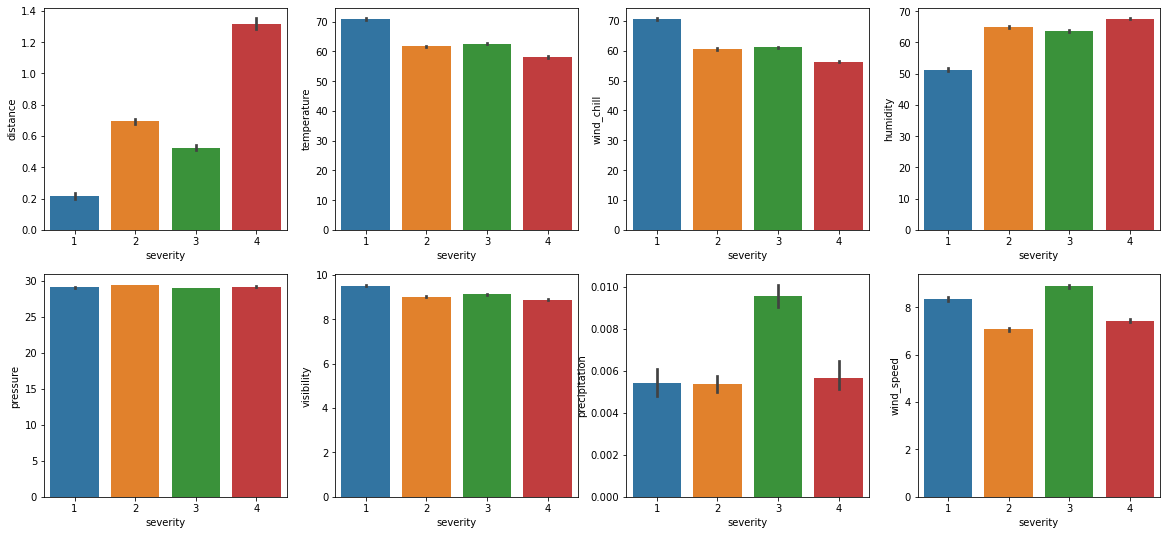

In [104]:
barplot_data(train)

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129144 entries, 21341 to 114685
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129144 non-null  object 
 1   severity               129144 non-null  int64  
 2   start_time             129144 non-null  object 
 3   end_time               129144 non-null  object 
 4   start_lat              129144 non-null  float64
 5   start_lng              129144 non-null  float64
 6   end_lat                129144 non-null  float64
 7   end_lng                129144 non-null  float64
 8   distance               129144 non-null  float64
 9   description            129144 non-null  object 
 10  street                 129144 non-null  object 
 11  side                   129144 non-null  object 
 12  city                   129144 non-null  object 
 13  county                 129144 non-null  object 
 14  state                  129144 no

<AxesSubplot:xlabel='severity', ylabel='count'>

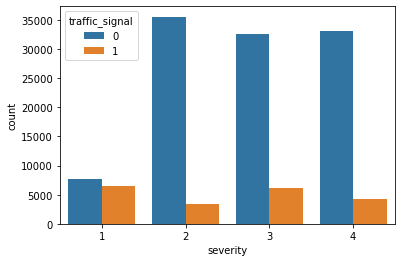

In [106]:
sns.countplot(x=train.severity, hue=train.traffic_signal)

<AxesSubplot:xlabel='severity', ylabel='count'>

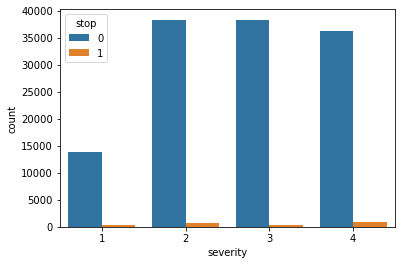

In [107]:
sns.countplot(x=train.severity, hue=train.stop)

<AxesSubplot:xlabel='severity', ylabel='count'>

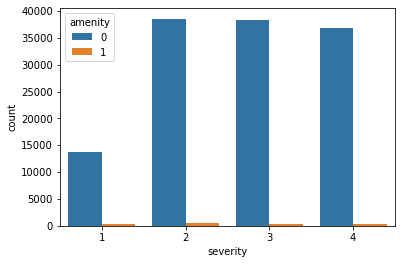

In [108]:
sns.countplot(x=train.severity, hue=train.amenity)

<AxesSubplot:xlabel='severity', ylabel='count'>

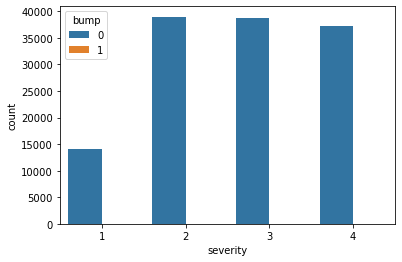

In [109]:
sns.countplot(x=train.severity, hue=train.bump)

<AxesSubplot:xlabel='severity', ylabel='count'>

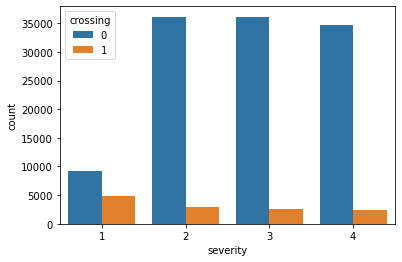

In [110]:
sns.countplot(x=train.severity, hue=train.crossing)

<AxesSubplot:xlabel='severity', ylabel='count'>

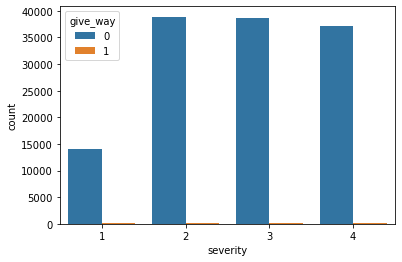

In [111]:
sns.countplot(x=train.severity, hue=train.give_way)

<AxesSubplot:xlabel='severity', ylabel='count'>

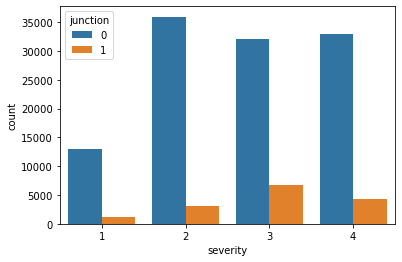

In [112]:
sns.countplot(x=train.severity, hue=train.junction)

<AxesSubplot:xlabel='severity', ylabel='count'>

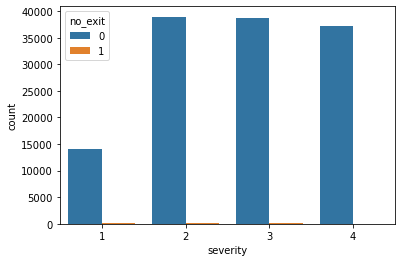

In [113]:
sns.countplot(x=train.severity, hue=train.no_exit)

<AxesSubplot:xlabel='severity', ylabel='count'>

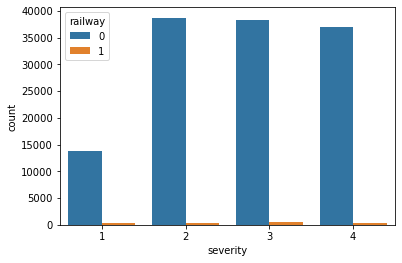

In [114]:
sns.countplot(x=train.severity, hue=train.railway)

<AxesSubplot:xlabel='severity', ylabel='count'>

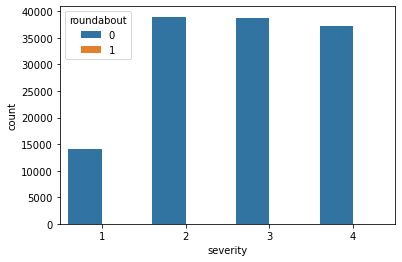

In [115]:
sns.countplot(x=train.severity, hue=train.roundabout)

<AxesSubplot:xlabel='severity', ylabel='count'>

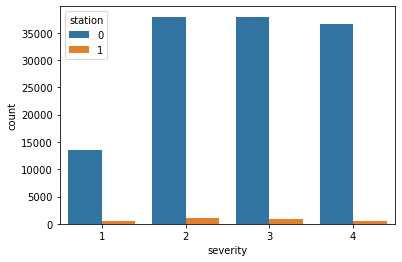

In [116]:
sns.countplot(x=train.severity, hue=train.station)

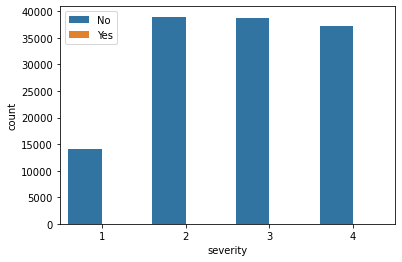

In [196]:
sns.countplot(x=train.severity, hue=train.traffic_calming)
plt.legend(labels=['No','Yes'])

In [197]:
def countplot_data(train):
    plt.figure(figsize=[20,16])
    plt.subplot(4,3,1)
    sns.countplot(x=train.severity, hue=train.traffic_calming)
    plt.subplot(4,3,2)
    sns.countplot(x=train.severity, hue=train.station)
    plt.subplot(4,3,3)
    sns.countplot(x=train.severity, hue=train.roundabout)
    plt.subplot(4,3,4)
    sns.countplot(x=train.severity, hue=train.railway)
    plt.subplot(4,3,5)
    sns.countplot(x=train.severity, hue=train.no_exit)
    plt.subplot(4,3,6)
    sns.countplot(x=train.severity, hue=train.junction)
    plt.subplot(4,3,7)
    sns.countplot(x=train.severity, hue=train.give_way)
    plt.subplot(4,3,8)
    sns.countplot(x=train.severity, hue=train.crossing)
    plt.subplot(4,3,9)
    sns.countplot(x=train.severity, hue=train.bump)
    plt.subplot(4,3,10)
    sns.countplot(x=train.severity, hue=train.amenity)
    plt.subplot(4,3,11)
    sns.countplot(x=train.severity, hue=train.stop)
    plt.subplot(4,3,12)
    sns.countplot(x=train.severity, hue=train.traffic_signal)
    plt.legend(labels=['No','Yes'])

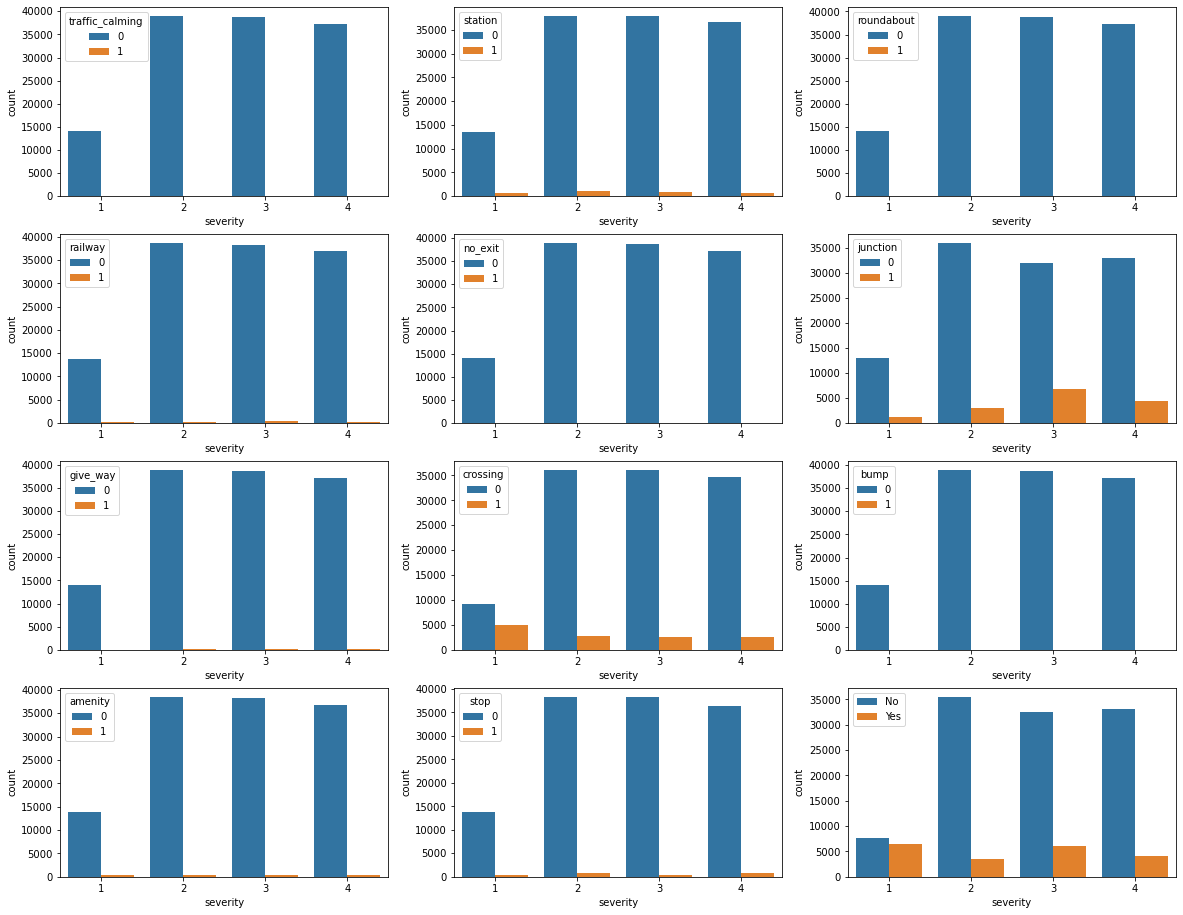

In [198]:
countplot_data(train)

(-0.1, 2.0)

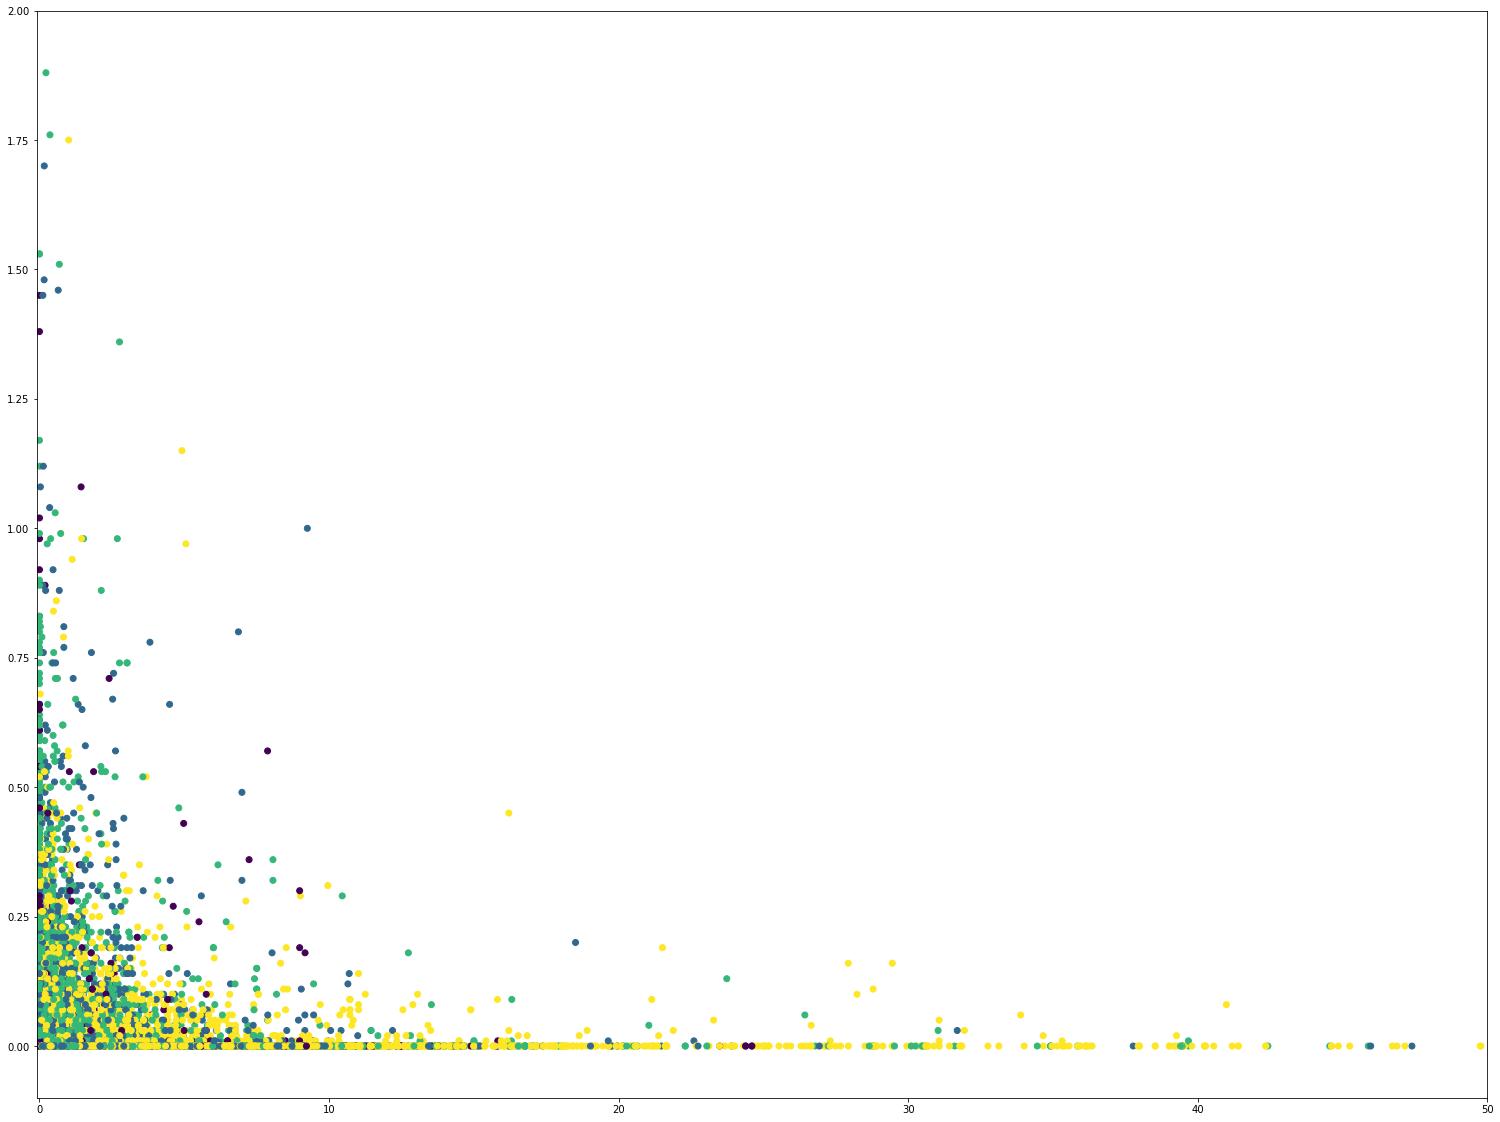

In [120]:
plt.figure(figsize=[26,20])
plt.scatter(data=train, x='distance', y='precipitation', c='severity')
plt.xlim(left=-.1,right=50)
plt.ylim(bottom=-.1,top=2)

In [121]:
sev1_dist = train[train.severity==1]['distance']
sev2_dist = train[train.severity==2]['distance']
sev3_dist = train[train.severity==3]['distance']
sev4_dist = train[train.severity==4]['distance']

In [122]:
print(sev1_dist.var())
print(sev2_dist.var())
print(sev3_dist.var())
print(sev4_dist.var())

1.1534935822217198
2.309731598490843
3.279870580469581
10.958911091775844


In [123]:
alpha = .05
stat, p = stats.levene(sev1_dist, sev2_dist)
if p < alpha:
    print('we can reject the null hypothesis and posit that variance is inequal')

we can reject the null hypothesis and posit that variance is inequal


In [124]:
alpha = .05
stat, p = stats.levene(sev3_dist, sev2_dist)
if p < alpha:
    print('we can reject the null hypothesis and posit that variance is inequal')

we can reject the null hypothesis and posit that variance is inequal


In [125]:
def stat_levene(x,y):
    alpha = .05
    stat, p = stats.levene(x,y)
    if p < alpha:
        print('we can reject the null hypothesis and posit that variance is inequal')
    else:
        print('we fail to reject the null hypothesis that variance is equal')

In [126]:
stat_levene(sev2_dist,sev4_dist)

we can reject the null hypothesis and posit that variance is inequal


In [127]:
stat, p = stats.kruskal(sev1_dist, sev2_dist, sev3_dist, sev4_dist)
stat, p

(27062.05667787575, 0.0)

In [128]:
p < alpha

True

In [129]:
def stat_kruskal(x,y,z):
    alpha = .05
    stat, p = stats.kruskal(x,y,z)
    if p < alpha:
        print('we can reject the null hypothesis that there is no mean difference.')
    else:
        print('we fail to reject the null hypothesis that there is no mean difference.')
    print(f'H: {stat}, p-value: {p}')

In [130]:
stat_kruskal(sev2_dist, sev3_dist, sev4_dist)

we can reject the null hypothesis that there is no mean difference.
H: 10544.089561177008, p-value: 0.0


In [131]:
cols = ['distance','precipitation','visibility','sunrise_sunset']

In [132]:
X_train = train[cols]
y_train = train.severity

X_validate = validate[cols]
y_validate = validate.severity

X_test = test[cols]
y_test = test.severity

In [133]:
train.severity.mode()

0    2
Name: severity, dtype: int64

In [134]:
len(train[train.severity==2]) / len(train)

0.301988477978071

In [135]:
clf = DecisionTreeClassifier(max_depth=4, random_state=217, class_weight='balanced')

In [136]:
clf = clf.fit(X_train, y_train)

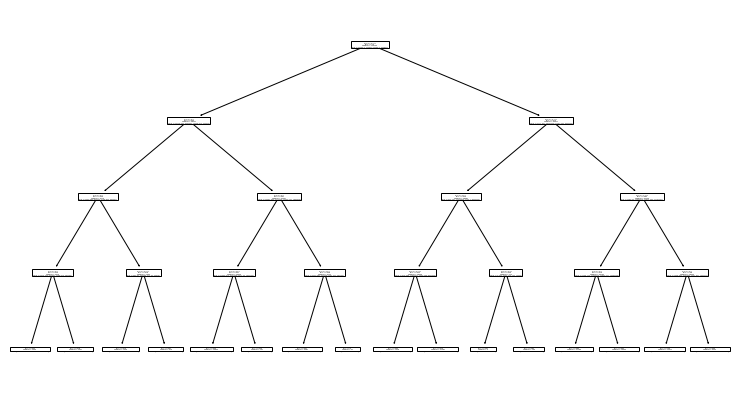

In [137]:
plt.figure(figsize=(13, 7))
plot_tree(clf)
plt.show()

In [138]:
y_pred = clf.predict(X_train)

In [139]:
y_pred_proba = clf.predict_proba(X_train)

In [140]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.42


In [141]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.35      0.86      0.49     14133
           2       0.50      0.37      0.43     39000
           3       0.61      0.05      0.10     38748
           4       0.40      0.67      0.51     37263

    accuracy                           0.42    129144
   macro avg       0.47      0.49      0.38    129144
weighted avg       0.49      0.42      0.36    129144



In [142]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.41


In [143]:
def tree_model(X_train, y_train, X_validate, y_validate, depth):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=217)
    clf = clf.fit(X_train, y_train)
    plt.figure(figsize=(13, 7))
    plot_tree(clf)
    plt.show()
    
    y_pred = clf.predict(X_train)
    y_pred_proba = clf.predict_proba(X_train)
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print(classification_report(y_train, y_pred))
    print('Accuracy of Decision Tree classifier on validate set: {:.2f}'.format(clf.score(X_validate, y_validate)))

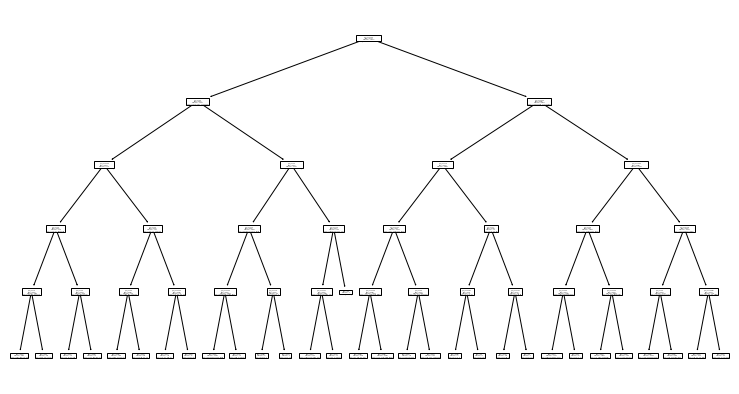

Accuracy of Decision Tree classifier on training set: 0.45
              precision    recall  f1-score   support

           1       0.42      0.01      0.01     14133
           2       0.51      0.36      0.42     39000
           3       0.47      0.47      0.47     38748
           4       0.40      0.68      0.51     37263

    accuracy                           0.45    129144
   macro avg       0.45      0.38      0.35    129144
weighted avg       0.46      0.45      0.42    129144

Accuracy of Decision Tree classifier on validate set: 0.44


In [144]:
tree_model(X_train, y_train, X_validate, y_validate, 5)

In [145]:
df_time = train.set_index('start_time').sort_index()

In [146]:
df_time.index = pd.to_datetime(df_time.index)

In [147]:
df_time[df_time.severity == 1].head()

,id,severity,end_time,start_lat,start_lng,end_lat,end_lng,distance,description,street,...,railway,roundabout,station,stop,traffic_calming,traffic_signal,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
start_time,,,,,,,,,,,,,,,,,,,,,
2020-02-18 16:05:00,A-2344900,1,2020-02-18 23:05:00,36.41327,-80.50550,36.41327,-80.50550,0.0,At Cook School Rd - Accident. Two lanes closed.,US-52 S,...,0,0,0,0,0,0,0,0,0,0
2020-02-18 22:30:00,A-2344907,1,2020-02-19 01:00:00,35.72362,-78.58421,35.72362,-78.58421,0.0,At Jones Sausage Rd - Accident. Two lanes closed.,I-40 W,...,0,0,0,0,0,0,1,1,1,1
2020-02-19 02:50:00,A-2346273,1,2020-02-19 05:50:00,35.72020,-80.38869,35.72020,-80.38869,0.0,At Long Ferry Road - Accident. Two lanes closed.,I-85 N,...,0,0,0,0,0,0,1,1,1,1
2020-02-19 04:05:00,A-2346274,1,2020-02-19 06:05:00,35.74891,-78.59443,35.74891,-78.59443,0.0,At I -440 - Accident. Right lane closed.,I-40 E,...,0,0,0,0,0,0,1,1,1,1
2020-02-19 06:58:00,A-2346277,1,2020-02-19 08:58:00,35.72360,-78.82303,35.72360,-78.82303,0.0,At Ten Ten Rd - Accident. Left lane closed.,Claude E Pope Memorial Hwy N,...,0,0,0,0,0,0,0,0,0,0


In [148]:
df_time[df_time.severity == 1].tail()

,id,severity,end_time,start_lat,start_lng,end_lat,end_lng,distance,description,street,...,railway,roundabout,station,stop,traffic_calming,traffic_signal,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
start_time,,,,,,,,,,,,,,,,,,,,,
2020-09-22 16:44:38,A-1779168,1,2020-09-22 17:29:38,32.19945,-110.90937,32.19945,-110.90937,0.000,At E 22nd St - Accident.,E 29th St,...,0,0,0,0,0,1,0,0,0,0
2020-09-22 16:44:38,A-1842273,1,2020-09-22 17:29:38,32.28284,-110.97811,32.28284,-110.97811,0.000,At W Wetmore Rd - Accident investigation work.,W Limberlost Dr,...,0,0,0,0,0,1,0,0,0,0
2020-09-22 16:44:38,A-1736992,1,2020-09-22 17:29:38,32.38084,-110.96392,32.38084,-110.96392,0.000,At N 1st Ave - Accident.,E Linda Vista Blvd,...,0,0,0,0,0,1,0,0,0,0
2020-09-22 16:46:15,A-1937744,1,2020-09-22 17:01:15,32.17783,-110.96829,32.17783,-110.96829,0.000,At S 12th Ave - Accident.,S 6th Ave,...,0,0,0,0,0,1,0,0,0,0
2020-10-12 11:15:01,A-1762592,1,2020-10-12 12:30:01,43.16683,-73.71462,43.09423,-73.75200,5.359,At RT-50/Exit 15 - Accident.,Adirondack Northway S,...,0,0,0,0,0,0,0,0,0,0


In [149]:
df_time['2020'].severity.value_counts()

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_18057/1308094306.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_time['2020'].severity.value_counts()


3    24270
1    14133
4    12398
2     9304
Name: severity, dtype: int64

In [150]:
df_time['2021'].severity.value_counts()

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_18057/1624630496.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_time['2021'].severity.value_counts()


2    26446
4    13043
Name: severity, dtype: int64

In [151]:
df_time['2019'].severity.value_counts()

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_18057/848790789.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_time['2019'].severity.value_counts()


3    12441
4     9632
2     3013
Name: severity, dtype: int64

In [152]:
df_time['2018'].severity.value_counts()

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_18057/3019511836.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_time['2018'].severity.value_counts()


4    969
3    853
2    113
Name: severity, dtype: int64

In [153]:
df_time['2017'].severity.value_counts()

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_18057/1256701689.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_time['2017'].severity.value_counts()


4    840
3    799
2     81
Name: severity, dtype: int64

In [154]:
df_time['2016'].severity.value_counts()

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_18057/1713945871.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_time['2016'].severity.value_counts()


3    385
4    381
2     43
Name: severity, dtype: int64

In [155]:
df_time.index.year.value_counts()

2020    60105
2021    39489
2019    25086
2018     1935
2017     1720
2016      809
Name: start_time, dtype: int64

In [156]:
df_time.index.month.value_counts()

6     19474
5     17837
4     17560
12    13284
3     10294
11     9915
10     8787
9      7442
1      6843
2      6445
8      5860
7      5403
Name: start_time, dtype: int64

In [157]:
df_time.index.day.value_counts()

22    5021
23    4915
19    4825
24    4704
20    4704
26    4561
18    4471
15    4413
27    4352
8     4249
12    4238
11    4237
9     4232
29    4218
21    4209
28    4165
10    4148
17    4141
3     4128
16    4125
30    4122
13    4078
25    4032
1     3921
6     3904
5     3868
7     3838
14    3822
2     3743
4     3449
31    2311
Name: start_time, dtype: int64

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='start_time', ylabel='count'>

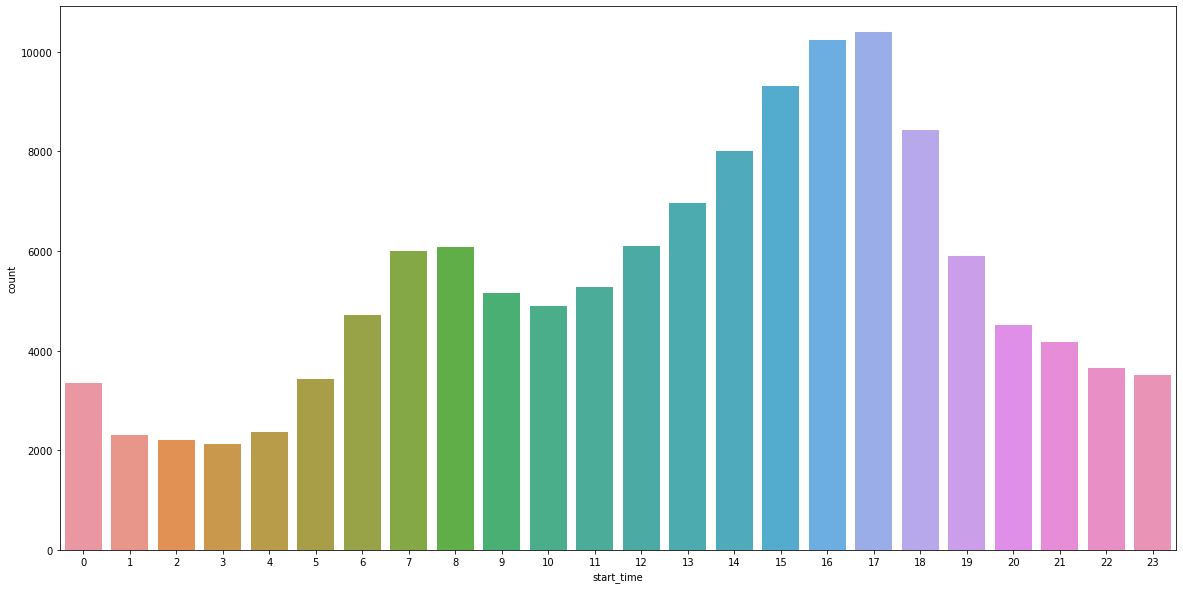

In [158]:
plt.figure(figsize=[20,10])
sns.countplot(df_time.index.hour)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='start_time', ylabel='count'>

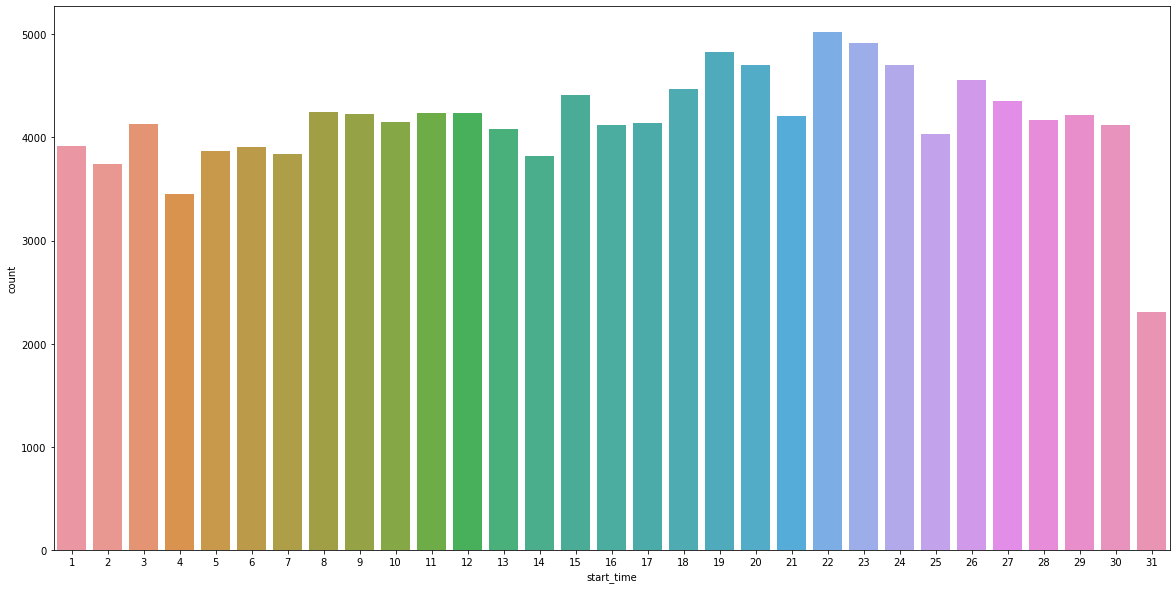

In [159]:
plt.figure(figsize=[20,10])
sns.countplot(df_time.index.day)

<AxesSubplot:xlabel='start_time', ylabel='count'>

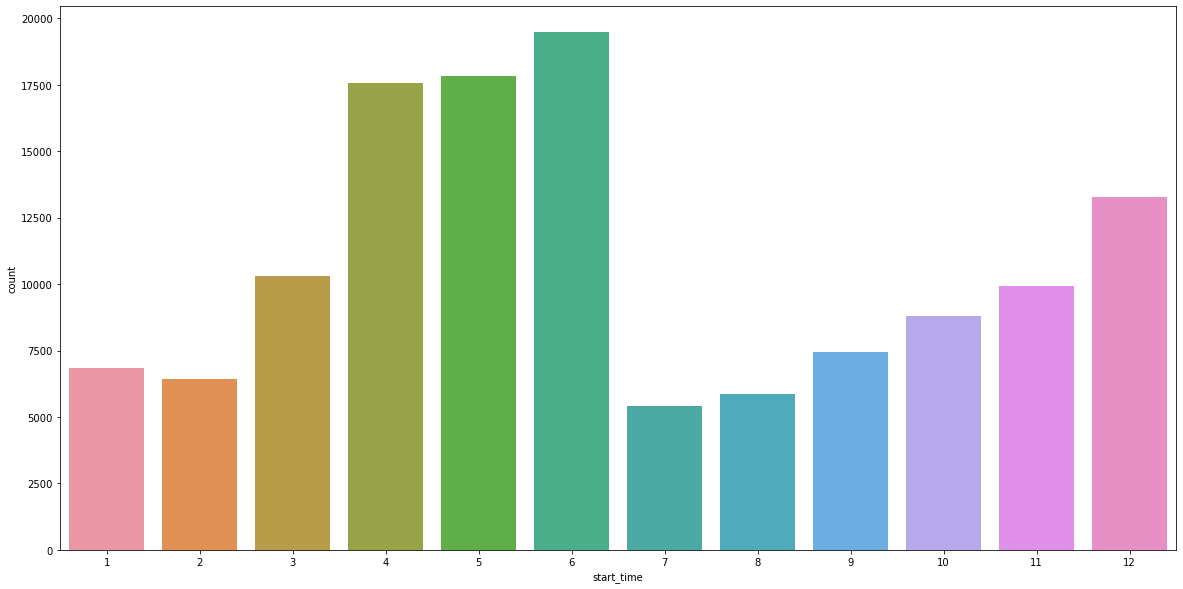

In [164]:
plt.figure(figsize=[20,10])
sns.countplot(x=df_time.index.month)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='start_time', ylabel='count'>

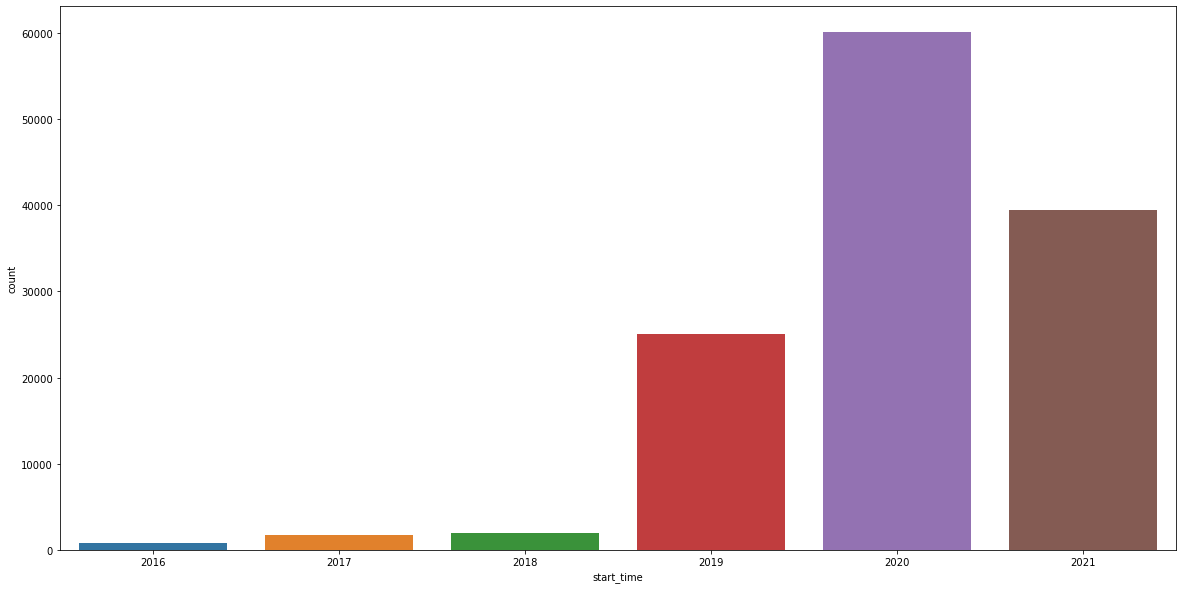

In [165]:
plt.figure(figsize=[20,10])
sns.countplot(df_time.index.year)

In [173]:
df_time.end_time = pd.to_datetime(df_time.end_time)

In [174]:
df_time['total_time'] = df_time.end_time - df_time.index

In [175]:
df_time.total_time.describe()

count                       129144
mean     0 days 06:51:56.462181750
std      7 days 19:39:24.378659385
min                0 days 00:03:30
25%                0 days 00:29:21
50%                0 days 00:49:58
75%                0 days 02:04:22
max              667 days 14:59:00
Name: total_time, dtype: object

In [176]:
df_time = df_time[df_time.total_time < '1 days']

In [178]:
df_time['distance'].describe()

count    127902.000000
mean          0.756572
std           2.185035
min           0.000000
25%           0.000000
50%           0.180000
75%           0.715000
max         149.687000
Name: distance, dtype: float64

In [179]:
def plot_time_data(df):
    df_time = df.set_index('start_time').sort_index()
    df_time.index = pd.to_datetime(df_time.index)
    plt.figure(figsize=[20,10])
    plt.subplot(2,2,1)
    sns.countplot(x=df_time.index.hour)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Accidents')
    plt.title('Accidents occur more frequently during the late afternoon')
    plt.subplot(2,2,2)
    sns.countplot(x=df_time.index.day)
    plt.xlabel('Day of the Month')
    plt.ylabel('Number of Accidents')
    plt.title('There is no relationship between accidents and day of the month')
    plt.subplot(2,2,3)
    sns.countplot(x=df_time.index.month_name())
    plt.xticks(rotation=90)
    plt.xlabel('Month')
    plt.ylabel('Number of Accidents')
    plt.title('Accidents occur more frequently toward the end of the year')
    plt.subplot(2,2,4)
    sns.countplot(x=df_time.index.year)
    plt.xlabel('Year')
    plt.ylabel('Number of Accidents')
    plt.title('The number of recorded accidents has increased each year')
    plt.suptitle('The Relationship between Vehicle Accidents and Different Measurements of Time')
    plt.show()

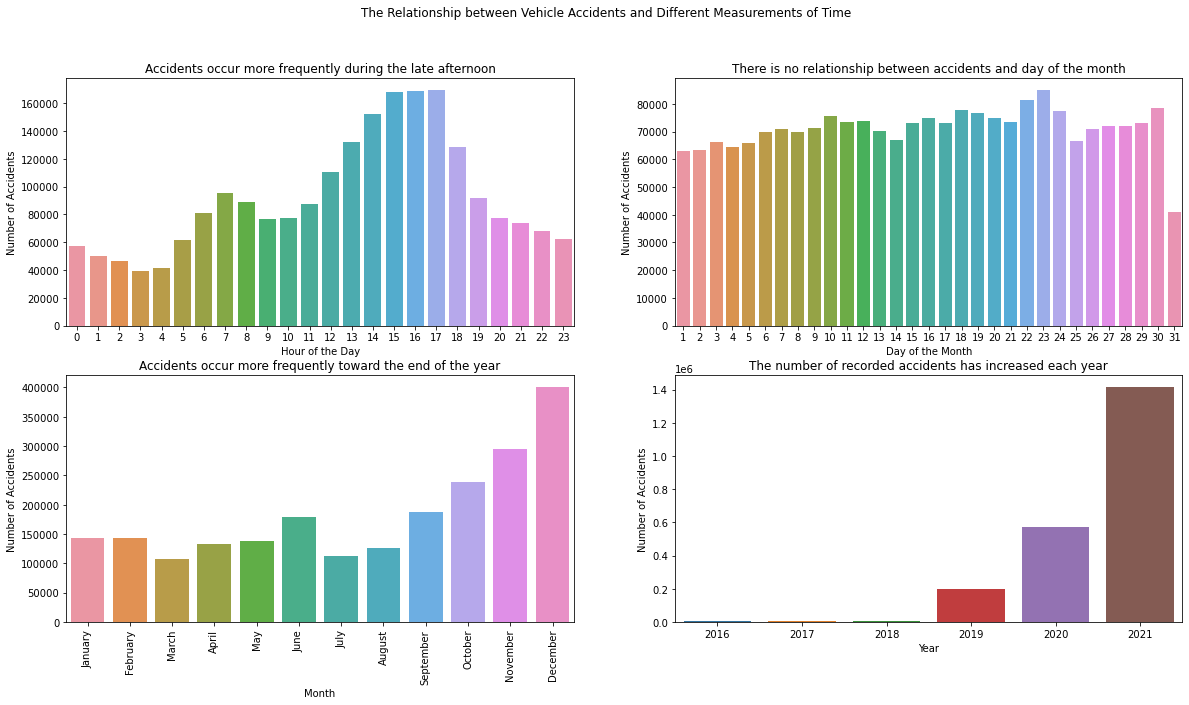

In [180]:
plot_time_data(df)

In [181]:
observed = pd.crosstab(train.severity, train.sunrise_sunset)
observed

sunrise_sunset,0,1
severity,,
1,11852,2281
2,24074,14926
3,29230,9518
4,21908,15355


In [182]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [183]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[11852  2281]
 [24074 14926]
 [29230  9518]
 [21908 15355]]

Expected
[[ 9527  4605]
 [26292 12707]
 [26122 12625]
 [25121 12141]]

----
chi^2 = 4710.1715
p     = 0.0


In [184]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


In [185]:
def stat_chi2(x,y):
    observed = pd.crosstab(x, y)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    #output values
    print('Observed')
    print(observed.values)
    print('\nExpected')
    print(expected.astype(int))
    print('\n----')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p}')
    if p < alpha:
        print('We reject the null hypothesis of independence.')
    else:
        print('We fail to reject the null hypothesis of independence.')

In [186]:
stat_chi2(train.severity, train.sunrise_sunset)

Observed
[[11852  2281]
 [24074 14926]
 [29230  9518]
 [21908 15355]]

Expected
[[ 9527  4605]
 [26292 12707]
 [26122 12625]
 [25121 12141]]

----
chi^2 = 4710.1715
p     = 0.0
We reject the null hypothesis of independence.


In [187]:
df_time['year'] = df_time.index.year
df_time['month'] = df_time.index.month
df_time['day'] = df_time.index.day

In [188]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127902 entries, 2016-02-08 07:53:43 to 2021-12-31 22:41:00
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   id                     127902 non-null  object         
 1   severity               127902 non-null  int64          
 2   end_time               127902 non-null  datetime64[ns] 
 3   start_lat              127902 non-null  float64        
 4   start_lng              127902 non-null  float64        
 5   end_lat                127902 non-null  float64        
 6   end_lng                127902 non-null  float64        
 7   distance               127902 non-null  float64        
 8   description            127902 non-null  object         
 9   street                 127902 non-null  object         
 10  side                   127902 non-null  object         
 11  city                   127902 non-null  object         
 